<a href="https://colab.research.google.com/github/mahmoudradwaan98/hello-world/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets

from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from sklearn.datasets import make_classification, make_circles

In [ ]:
def loadDataset():
  dataset = datasets.load_iris()
  features = dataset.data
  labels = dataset.target
  return dataset, features, labels

In [ ]:
def prepareDataset(X, y, cls_remove=None):
   cls = [0, 1, 2]
   if cls_remove is not None:
     features = []
     labels = []
     for index, (feat, label) in enumerate(zip(X, y)):
       if y[index] != cls_remove:
         features.append(feat)
         labels.append(label)
     cls.pop(cls_remove)
   else:
     features = X
     labels = y
   return np.array(features)[:, 2:4], np.array(labels), cls

In [ ]:
def plotData(features, labels, cls, class_names):
  colors = ['r', 'b', 'g']
  markers = ['o', '*', '+']
  for class_index in range(len(cls)):
    plt.scatter(features[labels == cls[class_index],0], features[labels == cls[class_index],1], c=colors[class_index], marker=markers[class_index], label=class_names[cls[class_index]])
  Title = "Iris Dataset with {n} classes".format(n=int(len(cls)))
  plt.title(Title)
  plt.xlabel('Petal Length (cm)')
  plt.ylabel('Petal width (cm)')
  plt.legend()

In [ ]:
def plotRegions(model, X):
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  XX, YY = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

  z = model.predict(np.c_[XX.ravel(), YY.ravel()])
  ZZ = z.reshape(XX.shape)
  plt.contourf(XX, YY, ZZ, alpha=0.2)

In [ ]:
def getAccuracy(model, x, y):
    return model.score(x,y)*100

def getClassNames(target_names):
    cls_all = {}
    for i, label in enumerate(target_names):
        cls_all[i] = label
    return cls_all

Class names= {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
Updated class index: [1, 2]
Number of samples: 100
Number of features: 2
Accuracy of model: 94.00%


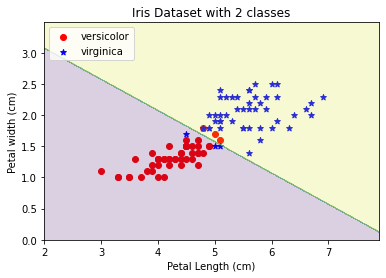


Classification Report:

              precision    recall  f1-score   support

           1       0.94      0.94      0.94        50
           2       0.94      0.94      0.94        50

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100


Confusion Matrix:

[[47  3]
 [ 3 47]]


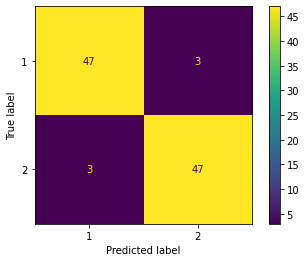

In [ ]:
def main():
    dataset, features, labels = loadDataset()
    X, y, cls_new = prepareDataset(features, labels, cls_remove=0)
    class_names = getClassNames(dataset.target_names)

    print('Class names=', class_names)
    print('Updated class index:', cls_new)
    print("Number of samples:", X.shape[0])
    print("Number of features:", X.shape[1])

    model = svm.SVC(kernel='linear', decision_function_shape='ovo', C=100)
    model.fit(X, y)
    print('Accuracy of model: {:.2f}%'.format(getAccuracy(model, X, y)))

    plotData(X, y, cls_new, class_names)
    plotRegions(model, X)
    plt.legend(loc="upper left")
    plt.show()

    y_true, y_pred = y, model.predict(X)
    print('\nClassification Report:\n')
    print(classification_report(y_true, y_pred))

    print('\nConfusion Matrix:\n')
    print(confusion_matrix(y, y_pred))
    ConfusionMatrixDisplay.from_estimator(model, X, y)
    
if __name__ == '__main__':
    main()

In [ ]:
import pandas as pd

In [ ]:
train = pd.read_csv("/content/drive/MyDrive/Dataset/DUMD_train.csv")
test = pd.read_csv("/content/drive/MyDrive/Dataset/DUMD_test.csv")

In [ ]:
X_tr = train.iloc[:, 0:5].values
y_tr = train.iloc[:, 5:].values
y_tr = np.reshape(y_tr, (323,))

X_ts = test.iloc[:, 0:5].values
y_ts = test.iloc[:, 5:].values
y_ts = np.reshape(y_ts, (80,))

In [ ]:
model = svm.SVC(kernel='linear', decision_function_shape='ovr', C=1)
model.fit(X_tr, y_tr)
print('Accuracy of model: {:.2f}%'.format(getAccuracy(model, X_ts, y_ts)))

Accuracy of model: 91.25%


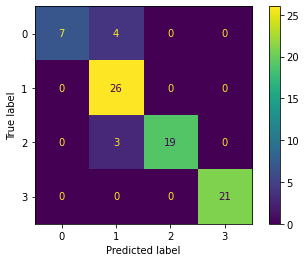

In [ ]:
ConfusionMatrixDisplay.from_estimator(model, X_ts, y_ts)